# EDA Case Study: Zomato Dataset
#### -Mayank Srivastava
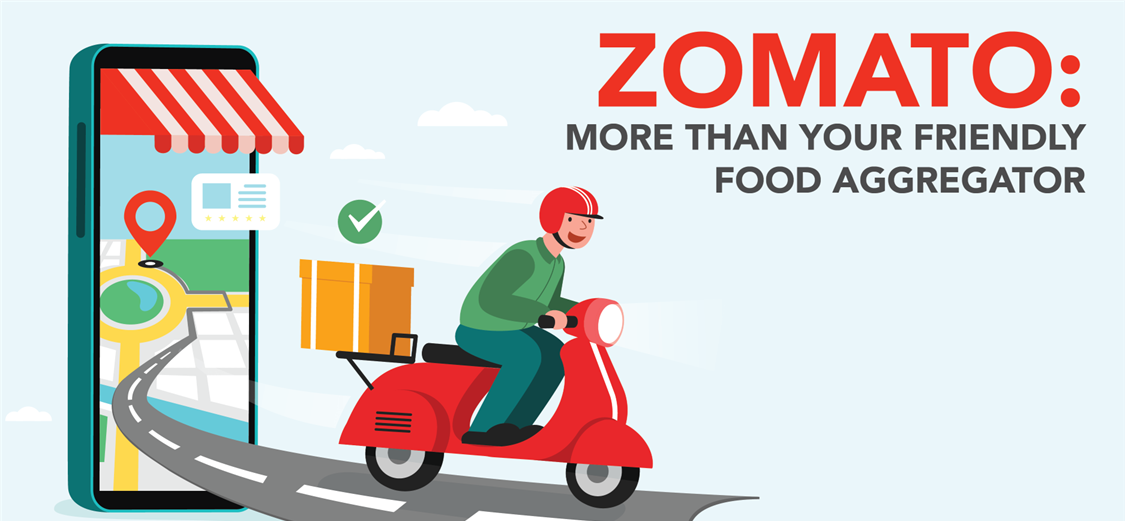

This task will challenge your data analysis skills
and give you a deeper understanding of the
dataset. The Zomato Restaurants Dataset
contains information about various restaurants,
their ratings, cuisines, locations, and more. Your
task is to perform EDA on this dataset and
answer the following questions.

Dataset Link:https://drive.google.com/file/d/1rorhuEt3qdBys4MzdsLcUo76uWAwSGuD/view?usp=drive_link

## Task instructions

1. Use Python and libraries like Pandas, Matplotlib, and Seaborn for data manipulation and visualization.
2. Before starting the analysis, clean the data by handling missing values and data types.
3. When answering each question, provide visualizations (such as bar plots, scatter plots, etc.) whenever applicable to support your findings.

In [1]:
#importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sns.set_style('darkgrid')
plt.style.use('ggplot')

In [2]:
#importing the dataset
df=pd.read_csv('zomato.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [3]:
#dropping unwanted columns
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis= 1,inplace= True)

In [4]:
#checking the shape
df.shape

(7105, 10)

In [5]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant name        7105 non-null   object 
 1   restaurant type        7105 non-null   object 
 2   rate (out of 5)        7037 non-null   float64
 3   num of ratings         7105 non-null   int64  
 4   avg cost (two people)  7048 non-null   float64
 5   online_order           7105 non-null   object 
 6   table booking          7105 non-null   object 
 7   cuisines type          7105 non-null   object 
 8   area                   7105 non-null   object 
 9   local address          7105 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 555.2+ KB


In [6]:
# checking for missing values
pd.DataFrame({'Missing val':df.isna().sum(), 'Missing val %':round(df.isna().sum()*100/len(df),2)})

,Missing val,Missing val %
restaurant name,0,0.00
restaurant type,0,0.00
rate (out of 5),68,0.96
num of ratings,0,0.00
avg cost (two people),57,0.80
online_order,0,0.00
table booking,0,0.00
cuisines type,0,0.00
area,0,0.00
local address,0,0.00


In [7]:
# making columns wise sumamry of values

for i in df.columns:
    print(i)
    print(df[i].unique())
    print(df[i].nunique())
    print('-'*50)
    

restaurant name
['#FeelTheROLL' '#L-81 Cafe' '#refuel' ... "Zu's Doner Kebaps" 'Zyara'
 'Zyksha']
7105
--------------------------------------------------
restaurant type
['Quick Bites' 'Cafe' 'Casual Dining' 'Takeaway, Delivery'
 'Bar, Casual Dining' 'Fine Dining' 'Pub' 'Casual Dining, Bar' 'Delivery'
 'Kiosk' 'Food Court' 'Microbrewery' 'Bar' 'Mess' 'Bakery'
 'Dessert Parlor' 'Beverage Shop' 'Sweet Shop' 'Dhaba' 'Cafe, Quick Bites'
 'Microbrewery, Casual Dining' 'Dessert Parlor, Beverage Shop'
 'Bar, Lounge' 'Quick Bites, Mess' 'Food Truck' 'Lounge, Bar'
 'Cafe, Dessert Parlor' 'Quick Bites, Beverage Shop' 'Pub, Casual Dining'
 'Pub, Microbrewery' 'Sweet Shop, Quick Bites' 'Cafe, Bakery'
 'Fine Dining, Bar' 'Bar, Pub' 'Bakery, Quick Bites'
 'Bakery, Beverage Shop' 'Bakery, Dessert Parlor' 'Takeaway' 'Lounge'
 'Microbrewery, Lounge' 'Lounge, Microbrewery'
 'Casual Dining, Microbrewery' 'Casual Dining, Pub' 'Bakery, Cafe'
 'Casual Dining, Cafe' 'Microbrewery, Pub' 'Cafe, Bar' 'Quick Bit

### Data Cleaning and Fixing missing values

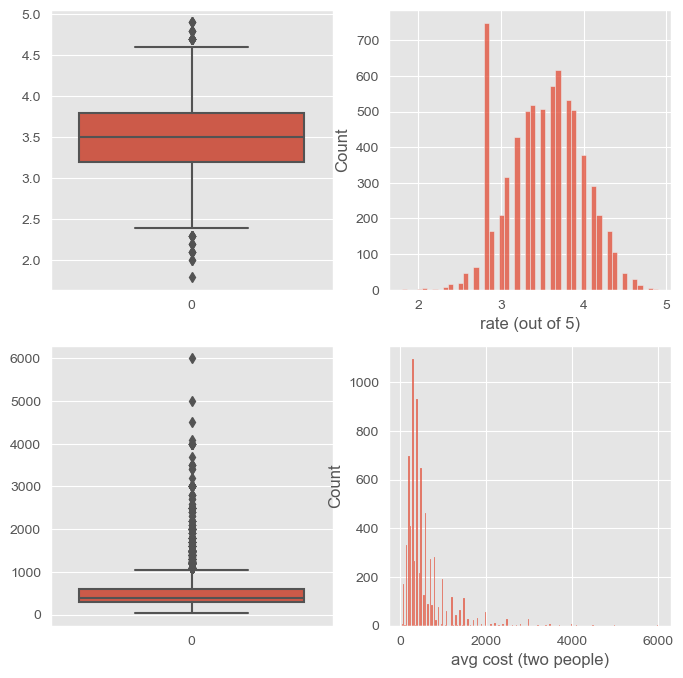

In [8]:
plt.figure(figsize =(8,8))
plt.subplot(2,2,1)
sns.boxplot(df['rate (out of 5)'])
plt.subplot(2,2,2)
sns.histplot(df['rate (out of 5)'])
plt.subplot(2,2,3)
sns.boxplot(df['avg cost (two people)'])
plt.subplot(2,2,4)
sns.histplot(df['avg cost (two people)'])

plt.show()

In [9]:
# due to outliers, for fixing missing values, we will use mean for rating and median for avg cost
df[['rate (out of 5)','avg cost (two people)']].agg(['mean','median'])

,rate (out of 5),avg cost (two people)
mean,3.514253,540.286464
median,3.500000,400.000000


In [10]:
df['rate (out of 5)'].fillna(df['rate (out of 5)'].mean(), inplace = True)
df['avg cost (two people)'].fillna(df['avg cost (two people)'].mean(), inplace = True)

### Descriptive Statistics

In [11]:
df.describe(include='all')

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
count,7105,7105,7105.000000,7105.000000,7105.000000,7105,7105,7105,7105,7105
unique,7105,81,NaN,NaN,NaN,2,2,2175,30,90
top,#FeelTheROLL,Quick Bites,NaN,NaN,NaN,Yes,No,"North Indian, Chinese","Byresandra,Tavarekere,Madiwala",Whitefield
freq,1,2840,NaN,NaN,NaN,3727,6361,421,798,459
mean,NaN,NaN,3.514253,188.921042,540.286464,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.461026,592.171049,461.041483,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.800000,1.000000,40.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,3.200000,16.000000,300.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,3.500000,40.000000,400.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.800000,128.000000,600.000000,NaN,NaN,NaN,NaN,NaN


#### Observations

1. The Zomato Restaurants Dataset contains information of 7105 different Restaurants.
2. There are 81 different Restaurant types, majority being 'Quick Bites' (2840 nos.)
3. The average rating of the restaurants is 3.5
4. The highest no. of ratings for a restaurant is 16,345 while the avearge no. of ratings is 190.
5. The average cost of two people is ₹ 540 and goes as high as ₹ 6,000
6. 3727/7105 restaurants provide the facaility of online_order
7. Table Booking facility is not available at 6361/7105 restaurants
8. There Dataset covers restaurant data providing 2,175 different cuisines with most prominent being North Indian, Chinese.
9. The dataset covers 30 different areas and 90 different local addresses.


### 1. What is the average rating of restaurants in the dataset?

In [12]:
round(df['rate (out of 5)'].mean(),1)

3.5

***The average rating of restaurants in the dataset is 3.5***

### 2. How many unique cities are represented in the dataset?

In [13]:
df.area.nunique()

30

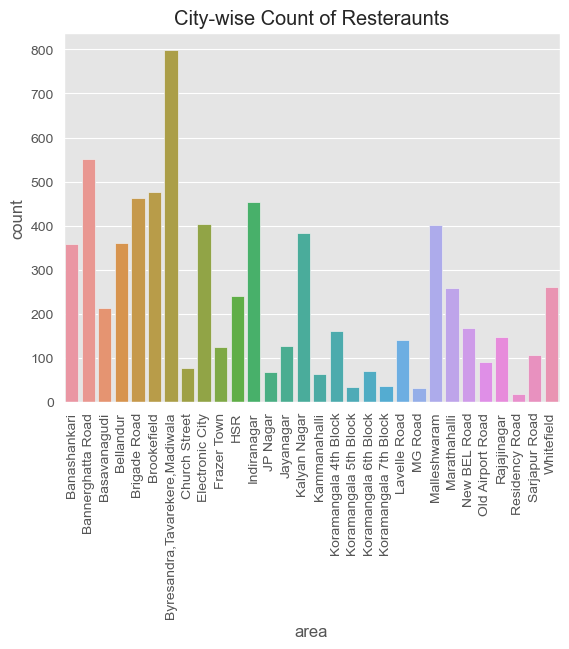

In [14]:
x=df.area.unique()
x.sort()
sns.countplot(x=df.area, order = x)
plt.xticks(rotation= 90)
plt.title('City-wise Count of Resteraunts')
plt.show()

***There are 30 unique cities in the dataset. Above is the countplot of city names sorted alphabetically.***

### 3. Which city has the highest number of restaurants?

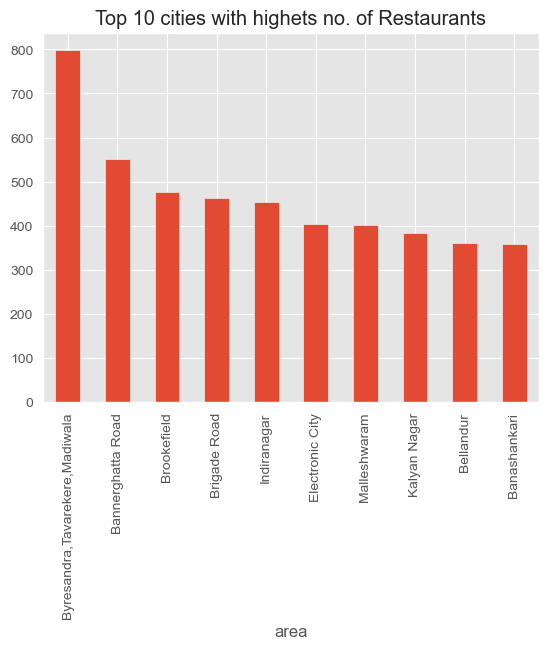

area
Byresandra,Tavarekere,Madiwala    798
Bannerghatta Road                 552
Brookefield                       477
Brigade Road                      464
Indiranagar                       455
Electronic City                   403
Malleshwaram                      402
Kalyan Nagar                      384
Bellandur                         361
Banashankari                      359
Name: count, dtype: int64

In [39]:
df.area.value_counts().head(10).plot(kind ='bar')

plt.title('Top 10 cities with highets no. of Restaurants')
plt.show()
df.area.value_counts().head(10)

***Above is the top 10 list of cities with highest no. of restaurants.***

***Byresandra,Tavarekere,Madiwala is at the top with 798 restaurants.***

### 4. Plot the distribution of restaurant ratings.

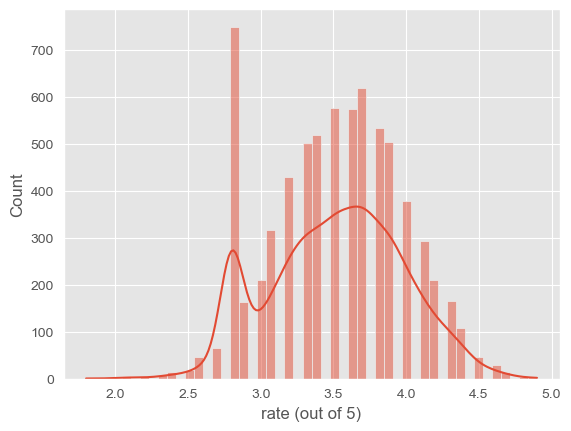

In [16]:
sns.histplot(x=df['rate (out of 5)'], kde = True)
plt.show()

In [17]:
df[df['rate (out of 5)']<3.0]['rate (out of 5)'].mode()

0    2.8
Name: rate (out of 5), dtype: float64

In [18]:
df[df['rate (out of 5)']>3.0]['rate (out of 5)'].mode()

0    3.7
Name: rate (out of 5), dtype: float64

***There distribution of restaurant ratings is approximately a bell-shaped curve but has two peaks one at 2.8 and another at 3.7***

### 5. Which cuisines are most common among the restaurants?

In [19]:
df['cuisines type'].value_counts().head(10)

cuisines type
North Indian, Chinese                  421
North Indian                           420
South Indian                           348
Fast Food                              140
South Indian, North Indian, Chinese    128
Biryani                                122
Bakery, Desserts                        97
Desserts                                87
Cafe                                    85
Bakery                                  77
Name: count, dtype: int64

***There top 10 most common cusinies in the dataset are given above. We have used a pie-plot to understand the distribution.***
 

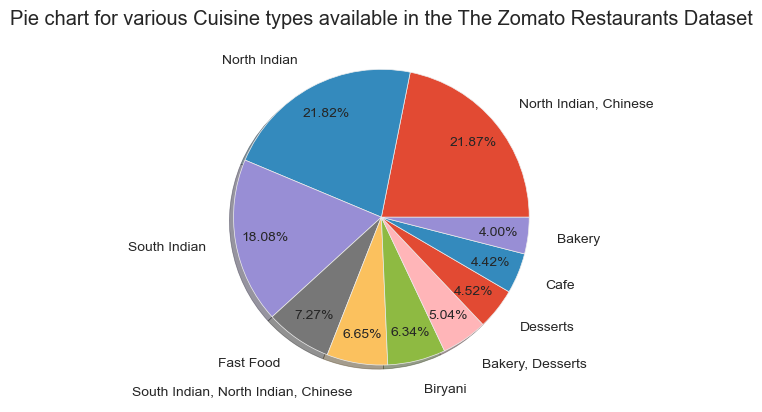

In [20]:
data=df['cuisines type'].value_counts().head(10)
plt.pie(data, labels =data.index, autopct='%1.2f%%', shadow = True, pctdistance= 0.8, labeldistance=1.2)
plt.title('Pie chart for various Cuisine types available in the The Zomato Restaurants Dataset')
plt.show()

### 6. What is the average cost for two people in different cities?

In [21]:
round(df.groupby('area')['avg cost (two people)'].mean().sort_index(),2)

area
Banashankari                      388.55
Bannerghatta Road                 446.97
Basavanagudi                      397.62
Bellandur                         545.74
Brigade Road                      836.27
Brookefield                       526.83
Byresandra,Tavarekere,Madiwala    488.72
Church Street                     747.28
Electronic City                   512.38
Frazer Town                       419.29
HSR                               460.54
Indiranagar                       669.96
JP Nagar                          441.30
Jayanagar                         498.74
Kalyan Nagar                      485.11
Kammanahalli                      513.25
Koramangala 4th Block             568.34
Koramangala 5th Block             368.57
Koramangala 6th Block             403.11
Koramangala 7th Block             461.40
Lavelle Road                      861.63
MG Road                           577.52
Malleshwaram                      578.01
Marathahalli                      520.89
New BEL Roa

***Above is an alphabetically sorted list of cities and their average cost for two people:***
 

### 7. Visualize the distribution of restaurant types (e.g., Casual Dining, Café, etc.)

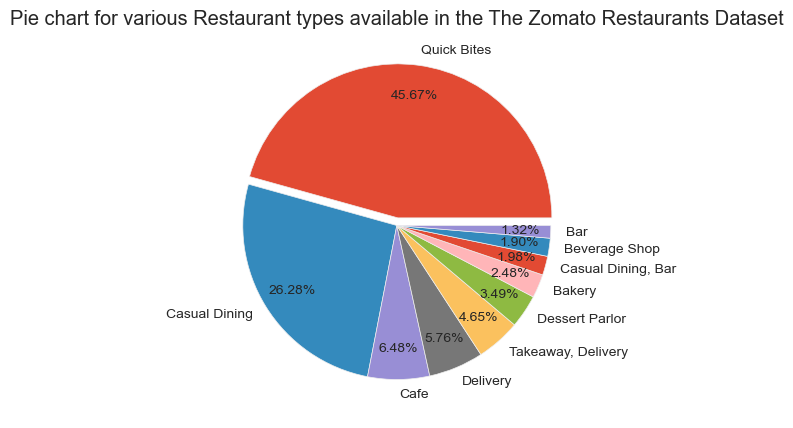

In [22]:
plt.figure(figsize =(5,5))
data= df['restaurant type'].value_counts().head(10)
plt.pie(data, labels = data.index, autopct= '%1.2f%%', explode= [0.05,0,0,0,0,0,0,0,0,0],pctdistance=0.8)
plt.title('Pie chart for various Restaurant types available in the The Zomato Restaurants Dataset')
plt.show()

In [23]:
data

restaurant type
Quick Bites           2840
Casual Dining         1634
Cafe                   403
Delivery               358
Takeaway, Delivery     289
Dessert Parlor         217
Bakery                 154
Casual Dining, Bar     123
Beverage Shop          118
Bar                     82
Name: count, dtype: int64

***Above is the list of top 10 restaurant types in the dataset:***
 

### 8. How does the rating correlate with the average cost for two people?

<Axes: xlabel='rate (out of 5)', ylabel='avg cost (two people)'>

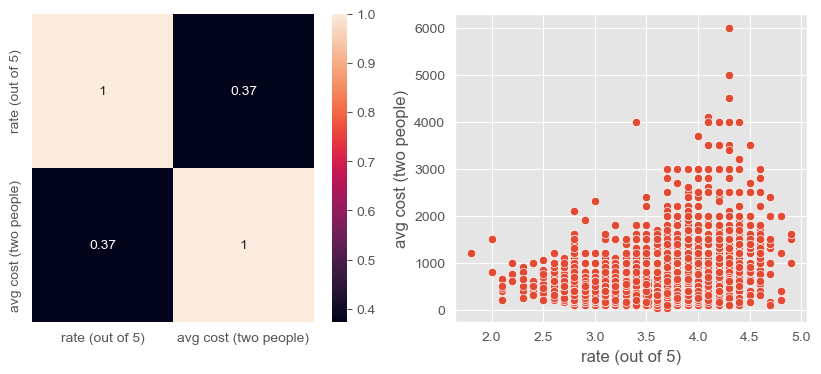

In [24]:
plt.figure(figsize =(10,4))
corr=df[['rate (out of 5)','avg cost (two people)']].corr()
plt.subplot(1,2,1)
sns.heatmap(corr,annot= True)
plt.subplot(1,2,2)
sns.scatterplot(x='rate (out of 5)', y='avg cost (two people)', data=df)

***As the correlation coeff is  <0.5, we can say that there is no correlation b/w Rating and avg cost for two***
 

### 9. What is the correlation between the numberof votes and the rating of restaurants?

<Axes: xlabel='rate (out of 5)', ylabel='num of ratings'>

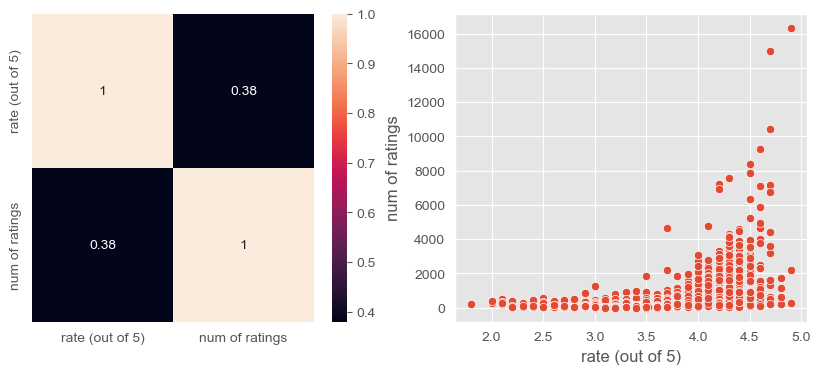

In [25]:

plt.figure(figsize =(10,4))
corr=df[['rate (out of 5)','num of ratings']].corr()
plt.subplot(1,2,1)
sns.heatmap(corr,annot= True)
plt.subplot(1,2,2)
sns.scatterplot(x='rate (out of 5)', y='num of ratings', data=df)

***As the correlation coeff is  <0.5, we can say that there is no correlation b/w Rating and No.of ratings***
 

### 10. Which area has the highest number of highly-rated restaurants (rating > 4.5)?

In [26]:
data= df[df['rate (out of 5)']>4.5]['restaurant name'] .groupby(df.area).count()
print(f'Maximum of {data.max()} nos. of restaurant with rating >4.5 are preset at {data.idxmax()}')

Maximum of 7 nos. of restaurant with rating >4.5 are preset at Byresandra,Tavarekere,Madiwala


In [27]:
print(data.head(10).sort_values(ascending = False))

area
Byresandra,Tavarekere,Madiwala    7
Brookefield                       5
HSR                               5
Indiranagar                       5
Brigade Road                      4
Banashankari                      2
Bellandur                         2
Jayanagar                         2
Bannerghatta Road                 1
Electronic City                   1
Name: restaurant name, dtype: int64


***Above is the list of areas with highest no. of highly rated restaurant (rating >4.5), with Byresandra,Tavarekere,Madiwala being on the top with 7 restaurants.***
 

### Some other observations

<Axes: >

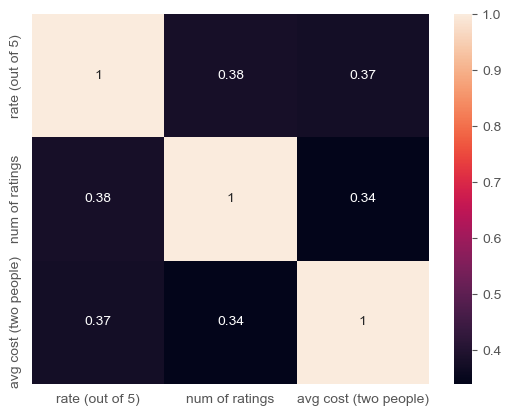

In [28]:
# heatmap of all numerical columns
corr=df.corr(numeric_only = True)
sns.heatmap(corr, annot = True)

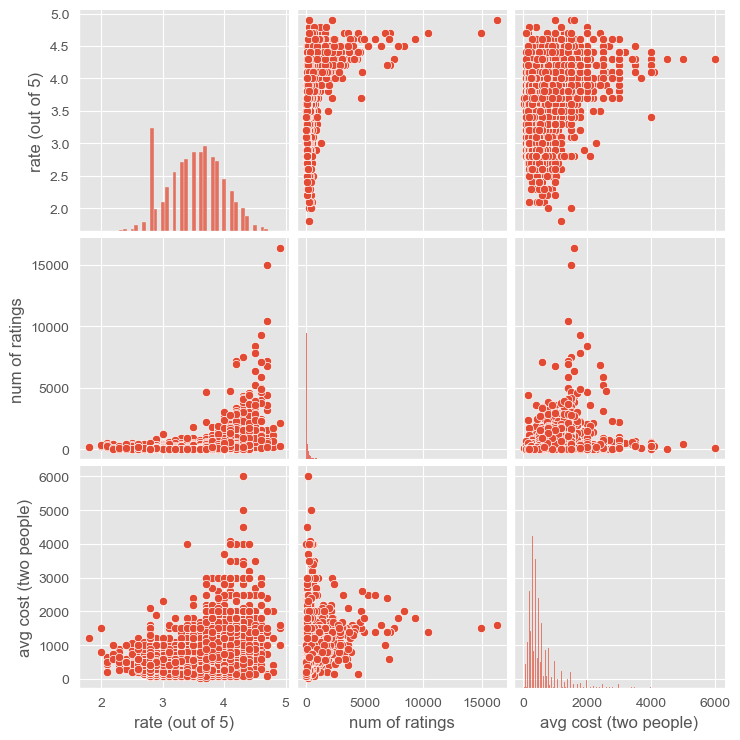

In [37]:
#pairplot
sns.pairplot(df)

***There is no correlation b/w ratings, avg cost of two and no. of ratings as all coeffcients are <0.5***

<Axes: xlabel='online_order', ylabel='count'>

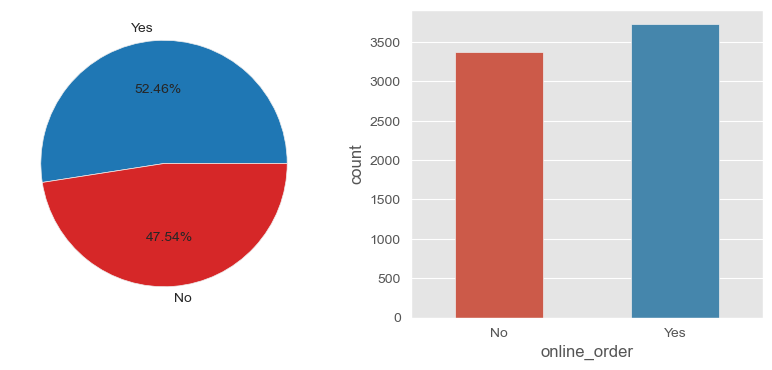

In [30]:
# percent of restaurants with online order and table fooking facility
plt.figure(figsize =(10,4))

plt.subplot(1,2,1)
data1=df['online_order'].value_counts()
plt.pie(data1, labels = data1.index, autopct ='%1.2f%%', colors = ['tab:blue','tab:red'])
plt.subplot(1,2,2)
sns.countplot(x=df['online_order'], width =0.5)

<Axes: xlabel='table booking', ylabel='count'>

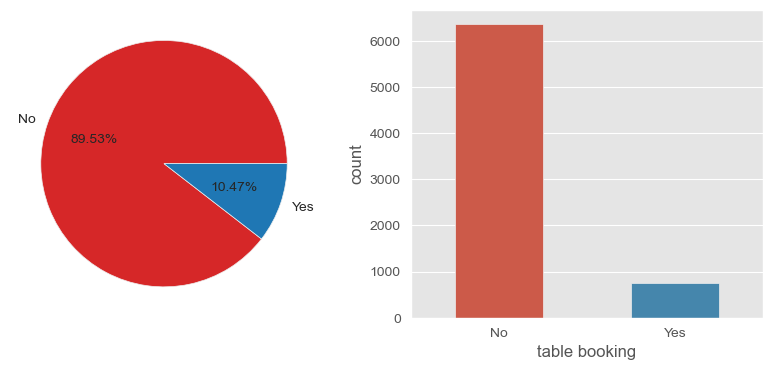

In [31]:
# percent of restaurants with online order and table fooking facility
plt.figure(figsize =(10,4))

plt.subplot(1,2,1)
data1=df['table booking'].value_counts()
plt.pie(data1, labels = data1.index, autopct ='%1.2f%%',colors = ['tab:red','tab:blue'])
plt.subplot(1,2,2)
sns.countplot(x=df['table booking'], width =0.5)

In [32]:
#lets find the most expensive and most cheap Restaurant in the dataset
df['avg cost (two people)'].agg(['min', 'max'])

min      40.0
max    6000.0
Name: avg cost (two people), dtype: float64

In [33]:
df[df['avg cost (two people)']==6000]

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
3561,Le Cirque Signature - The Leela Palace,Fine Dining,4.3,126,6000.0,No,Yes,"French, Italian",Indiranagar,Old Airport Road


In [34]:
df[df['avg cost (two people)']==40]

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
5849,Srinidhi Sagar Deluxe,Quick Bites,3.6,108,40.0,Yes,No,"South Indian, North Indian, Chinese",Koramangala 4th Block,Domlur
5850,Srinidhi Sagar Food Line,Quick Bites,3.7,129,40.0,Yes,No,"South Indian, North Indian, Chinese",Brigade Road,Indiranagar


In [35]:
# lets find restaurants with Highest rating
df['rate (out of 5)'].agg(['max'])

max    4.9
Name: rate (out of 5), dtype: float64

In [36]:
df[df['rate (out of 5)']==4.9]

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
466,Asia Kitchen By Mainland China,"Casual Dining, Bar",4.9,2178,1500.0,Yes,Yes,"Asian, Chinese, Thai, Momos","Byresandra,Tavarekere,Madiwala",Koramangala 5th Block
1035,Byg Brewski Brewing Company,Microbrewery,4.9,16345,1600.0,Yes,Yes,"Continental, North Indian, Italian, South Indi...",Bellandur,Sarjapur Road
5271,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,Casual Dining,4.9,246,1000.0,No,Yes,"Healthy Food, Salad, Mediterranean",Old Airport Road,Indiranagar


## Observations:

1. The shape of the original dataset (7105, 12), but has two Unnamed cols. Useful data shape is (7105, 10)
2. The Zomato Restaurants Dataset contains information of 7105 different Restaurants.
2. There are 81 different Restaurant types, majority being 'Quick Bites' (2840 nos. i.e. 45.67%)
3. The average rating of the restaurants is 3.5
4. The highest no. of ratings for a restaurant is 16,345 while the avearge no. of ratings is 190.
5. The average cost of two people is ₹ 540 and goes as high as ₹ 6,000
6. 3727/7105 restaurants provide the facaility of online_order
7. Table Booking facility is not available at 6361/7105 restaurants
8. There Dataset covers restaurant data providing 2,175 different cuisines with most prominent being North Indian, Chinese.
9. The dataset covers 30 different areas and 90 different local addresses.
10. Byresandra,Tavarekere,Madiwala has the highest no.of restaurants (798 nos.).
11. The most expensive Restaurant is 'Le Cirque Signature - The Leela Palace' which is a Fine-dining place with French, Italian	cuisine types, in Old Airport Road, Indiranagar. The place has no online order facility but table booking can be done.
12. Srinidhi Sagar Deluxe (Koramangala 4th Block) and Srinidhi Sagar Food Line (Brigade Road) are the restaurnats with cheapest avg cost for two.
13. There are 3 Restaurants with Highest Rating of 4.9:
    1. Asia Kitchen By Mainland China
    2. Byg Brewski Brewing Company
    3. SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...	
14. There is no correlation b/w ratings, no. of ratings and avg cost of two as all correlation coeffcients are <0.5

# ----------------------------------------------End of Report---------------------------------------------